<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by David B. Steffelbauer and Mark Bakker*
## Notebook xx: Optimization with Genetic Algorithms

### Introduction

In this notebook we will learn how to find minima in arbitrary functions. Finding minima is a field in mathematics that is called [Mathematical Optimization](https://en.wikipedia.org/wiki/Mathematical_optimization). Optimization of functions is of high importance in various fields ranging from finance to engineering. For example, airline companies have to schedule flights and airplanes in an optimal way to minimise costs, delivery companies have to find the shortest path between their customers and investors seek to minimise their risk while optimising their profit. All these problems are optimisation problems.

Not only engineers, but also nature itself optimises. The principle behind the evolution of species is that individuals that are best adapted to the environment are more likely to survive. This is called the survival of the fittest. Increasing the adaption of species to their environment can be seen as optimising the fitness of a species. 

The whole information of one individual is decoded in its genes, which can be seen as input parameters of functions. Better adaption leads to higher chance of breeding with other individuals of the same species and passing your fit genes to the next generation. We will learn throughout this notebook how the rules of evolution can be translated into computer code and how the underlying mechanisms can be used to find minima in functions.

Note: Make sure that all graphs that you produce include labels along the horizontal and vertical axes, a title and, if you are plotting multiple things in one graph, a legend.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### The Rastrigin function

We will try to find an optimum in a very nasty function, the [Rastrigin Function](https://en.wikipedia.org/wiki/Rastrigin_function). The Rastrigin function is widespread used as a test problem for optimization algorithms. The function is a multi-modal function which means that it possesses many local optima and  has one global optimum. 

<img src="rastrigin3d.png" width="700">

It is defined in $D$ dimensions as follows
\begin{align}
f(\mathbf{x}) \ = \ a \cdot D + \sum_{i=1}^{D} \left(x_{i}^{2} - a \cdot \cos (2 \pi x_i) \right)
\end{align}

and has besides its many local minima a global minimum $\mathbf{x}^\ast$ at 
\begin{align}
\mathbf{x}^\ast = \mathbf{0} \quad \text{with} \quad f(\mathbf{x}^\ast) = 0
\end{align}
This global minimum is the minimum we want to find.

The gradient (first derrivative) results in 

\begin{align}
\frac{\partial f(\mathbf{x})}{\partial x_i} = 2 x_i + 2 \pi  a \sin \left(2 \pi x_i\right)
\end{align}

Setting the gradient to zero, we can see that the function has an infinite number of local optima at 
\begin{align}
	x_i = \frac{n_i}{2} \quad \text{with} \quad n_i \in \mathbb{Z} \quad \forall \ i 
\end{align}


The Hessian calculation leads to
\begin{equation}
	\frac{\partial^2 f(\mathbf{x})}{\partial x_i \partial x_j} = \begin{cases} 
	\text{if } i = j: &2 + 4 \pi^2 a \cos \left( 2 \pi x_i\right) \\
	\text{if } i\neq j:	&\qquad \quad 0  
	\end{cases}
\end{equation}
The Hessian is a sparse, diagonal matrix. The determinant of the Hessian is positive if $n_i$ is even leading to a local minimum, whereas if $n_i$ is odd, a negative determinant and a local maximum results.

### Exercise 1. The Rastrigin function

The first exercise is to implement the Rastrigin function in arbitrary dimensions. Set $a$ to 10. Use a vector of arbitrary length as input parameter of the function ($\rightarrow$ numpy package!). Compute the function values for the two dimensional points (a) (x,y)=(-0.5,0.5), (b)  (x,y)=(0.0,0.5), (c) for the global optimum in two dimensions, (d) for a vector containing just ones of length 5 and, finally, (e) a vector of length 10 with the numbers one to ten. Print the results to the screen. Note: Use the numpy package for obtaining the numerical value for $\pi$ ([$\rightarrow\texttt{np.pi}$](https://docs.scipy.org/doc/numpy/reference/constants.html#numpy.pi)) and for the cosine function ([$\rightarrow\texttt{np.cos}$](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cos.html)).

In [2]:
def rastrigin(xvector, a=10):
    
    D = len(xvector)
    value = D * a 
    for x in xvector:
        value += x ** 2 - a * np.cos(2 * np.pi * x)
    return value

In [3]:
points = [[-0.5, 0.5],
          [0.0, 0.5],
          np.ones(5),
          np.arange(10)+1]

for point in points:
    string = ', '.join(f'{i: 2.2f}' for i in point)
    print(f'Point ({string}) => {rastrigin(point)}')

Point (-0.50,  0.50) => 40.5
Point ( 0.00,  0.50) => 20.25
Point ( 1.00,  1.00,  1.00,  1.00,  1.00) => 5.0
Point ( 1.00,  2.00,  3.00,  4.00,  5.00,  6.00,  7.00,  8.00,  9.00,  10.00) => 385.0


### Exercise 2. Computation of 2d-function values of the Rastrigin function
Compute the Rastrigin function for different x-y combinations at once on a two dimensional mesh. Use [$\texttt{np.linspace}$](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to produce a vector between -2 and +2 with 100 samples. Use [$\texttt{np.meshgrid}$](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) to produce a two dimensional mesh $X$ and $Y$. Compute the two-dimensional function values $Z$ with your implementation of the rastrigin function (Hint: Give the function values as list to the rastrigin function $\texttt{Z = rastrigin([X,Y])}$). Compute the minimum of $Z$ and the $x$ and $y$ coordinates belonging to this minimum and print the minimum and the coordinate values to the screen. Why is the computed minimum different to the minimum of the analytical computation? What can you do to retrieve the real global optimum?

In [4]:
x = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, x)

Z = rastrigin([X,Y])

f_min = np.min(Z)
index = np.unravel_index(np.argmin(Z), Z.shape)
coords = [x[i] for i in index]

print(f'Computed minimum min(Z) = {f_min:.2f} at point ({coords[0]:.3f}, {coords[1]:.3f})')


Computed minimum min(Z) = 0.16 at point (-0.020, -0.020)


### Exercise 3. Plotting of 2d-Rastrigin function
Plot the two-dimensional Rastrigin function with matplotlib's [$\texttt{contourf}$](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html) function. Add axis labels ($x$ and $y$) and a [colorbar](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.colorbar.html) with a colorbar label ($f(x,y)$). Compute the minimum at $x_0=0$ and $y_0=0$, add a title containing the minimum value and [annotate](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.annotate.html) the minimum in the contourplot with an arrow and a text with '$f(x_0, y_0) = $' and the computed minimum value ([$\rightarrow$Hint](https://matplotlib.org/users/annotations.html)).

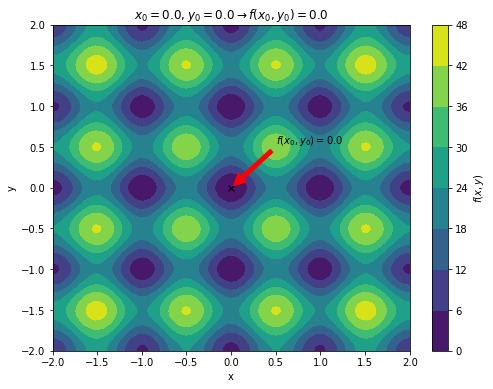

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.contourf(X, Y, Z)
cb = plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')

cb.set_label(r'$f(x, y)$')

# Get minimum value in Rastrigin function and plot it
x0 = 0.0
y0 = 0.0
z0 = rastrigin([x0, y0])

plt.plot(0, 0, marker='x', color='k')
# plt.text(0, 0, f'$f(x_0, y_0) = {z0}$')
plt.title(f'$x_0 = 0.0, y_0=0.0 \\rightarrow f(x_0, y_0) = {z0}$')
plt.annotate(f'$f(x_0, y_0) = {z0}$',
             xy=[x0, y0],
             arrowprops=dict(color='r', shrink=0.05),
             horizontalalignment='left',
             verticalalignment='bottom',
             xytext=(0.5, 0.5));


### Exercise 4. Find the minimum by coincidence and show the convergence
Produce 100000 uniformly distributed two-dimensional random points between -2 and +2 ([$\rightarrow \texttt{np.random.uniform}$](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html)) and compute the Rastrigin function values. Show the convergence to the minimum, in other words, how the minimum value of the function gets smaller and smaller in dependency of the number of random numbers (Hint: use [$\texttt{np.minimum.accumulate}$](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ufunc.accumulate.html)). Plot the result as a [loglog](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.loglog.html) plot and print the found minimum value to the screen. Don't forget to add axis labels and a title.

Monte Carlo minimum is =  0.01169304409703642


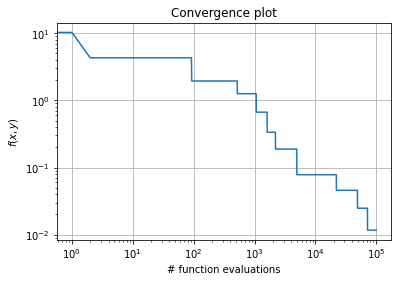

In [6]:
R = np.random.uniform(low=-2.0, high=2.0, size=(2, 100000))
R_x = R[0, :]
R_y = R[1, :]

values = np.minimum.accumulate(rastrigin([R_x, R_y]))

fig, ax = plt.subplots(1, 1)

plt.loglog(values)
plt.title('Convergence plot')
plt.xlabel('# function evaluations')
plt.ylabel(r'$f(x,y)$')
plt.grid(True)
print('Monte Carlo minimum is = ', values[-1])

### Genetic Algorithms

<img src="genetics.jpg" width="700">


[Genetic Algorithms (GA)](https://en.wikipedia.org/wiki/Genetic_algorithm) are widely used to obtain optimal solutions to countless problems in the water related field. GAs — first proposed by [John H. Holland](https://en.wikipedia.org/wiki/John_Henry_Holland) in 1975 — mimic the principles of evolution to solve optimization problems. GAs are population based. Hence, not just a single solution evolves over time, but rather they utilize the collective learning process of a population consisting of many single solutions. Each solution —called individual— consists of parameters —called genes— which represents a single search point in the parameter space. Descendants of individuals are produced by random either (i) through reproduction by exchanging genes with other individuals or (ii) by mutation, introducing randomly small changes in genes mimicking germ line mutation effects. Subsequently, the fitness of each individual is determined and fitter individuals are more likely to survive and reproduce, thus, giving their good genes to potentially more descendants and hence increasing the fitness of the whole population over time.

We will learn step by step in the following exercises how to implement a GA and show that the theory of evolution can be used to find minima in functions. First, we will start by implementing the individual class. Second, we will initialize a whole population of individuals over the whole search space. Then we will learn how to combine the genes of multiple individuals to produce children, how to mutate the genes of the children to obtain new solutions, how to select the best solutions and how to put everything together resulting in a working implementation of a Genetic Algorithm.

<img src="gaScheme.jpg" width="700">

### Exercise 5. Construct an Individual class object

Implement a Python class Individual which has two properties (1) a genome and (2) a fitness value. The genome is a vector of real numbers (genes), the fitness value is the function value obtained by the Rastrigin function with the genome as its input. The $\texttt{__init__}$ method should take as arguments the genome, the fitness value should be [NaN](https://en.wikipedia.org/wiki/NaN) (not a number) by default ([$\texttt{np.nan}$](https://docs.scipy.org/doc/numpy-1.13.0/user/misc.html)).  Add an evaluate method to the class that computes the Rastrigin function only if the fitness is NaN. Override the $\texttt{__repr__}$ method to have a nice representation of the individual's genes and fitness when the print function is called. Use the points from exercise 1 to check if your implementation and the evaluate method is working (Hints on how to construct classes and override methods can be found in 
[Notebook 12](https://nbviewer.jupyter.org/github/mbakker7/exploratory_computing_with_python/blob/master/notebook12_oop/py_exploratory_comp_12_sol.ipynb)).

In [7]:
class Individual(object):

    def __init__(self, genome=None):
        self.genome = genome
        self.fitness = np.nan

    def evaluate(self):
        if np.isnan(self.fitness):
            self.fitness = rastrigin(self.genome)

    def __repr__(self):
        string = f'Individual with Genome: [' 
        string += ', '.join(f'{i: 2.2f}' for i in self.genome)
        string += f'] => f(x): {self.fitness:=6.3f}'
        return string

In [8]:
points = [[-0.5, 0.5],
          [0.0, 0.5],
          np.ones(5),
          np.arange(10)+1]

for genome in points:
    ind = Individual(genome=genome)
    ind.evaluate()
    print(ind)


Individual with Genome: [-0.50,  0.50] => f(x): 40.500
Individual with Genome: [ 0.00,  0.50] => f(x): 20.250
Individual with Genome: [ 1.00,  1.00,  1.00,  1.00,  1.00] => f(x):  5.000
Individual with Genome: [ 1.00,  2.00,  3.00,  4.00,  5.00,  6.00,  7.00,  8.00,  9.00,  10.00] => f(x): 385.000


### Intitialization
An initialization procedure generates a population of individuals with hundreds or thousands of possible solutions. The number of individuals in a population is called the population size ($popsize$). Usually, the single individuals are produced randomly over the whole parameter space. Occasionally, the solutions may be "seeded" in areas where the optimal solutions is supposed to be found.

### Exercise 6. Initialize population

Write an initialization function ($\texttt{initialize}$) that returns a population of $popsize$ individuals in a two dimensional ($D=2$) parameter space within $x_i \in [-2, 2]$. The population should be a $\texttt{list}$ of $\texttt{Individual}$ instances. Use $popsize=10$. Subsequently, evaluate each individual in the population and print the whole population on the screen by looping over all Individuals.

In [9]:
def initialize(popsize, dimensions=2, low=-2.0, high=+2.0):

    population = []
    for _ in range(popsize):
        genes = np.random.uniform(low=low, high=high, size=2)
        ind = Individual(genome=genes)
        population.append(ind)
    return population


popsize = 10

population = initialize(popsize)

print('The Population consists of ...')
for ind in population:
    ind.evaluate()
    print('->\t an', ind)

The Population consists of ...
->	 an Individual with Genome: [ 0.61,  0.65] => f(x): 34.175
->	 an Individual with Genome: [-1.67,  0.90] => f(x): 20.561
->	 an Individual with Genome: [-1.15, -0.01] => f(x):  5.416
->	 an Individual with Genome: [-0.54,  1.21] => f(x): 28.956
->	 an Individual with Genome: [ 1.12, -0.85] => f(x):  8.900
->	 an Individual with Genome: [-1.60, -0.86] => f(x): 24.766
->	 an Individual with Genome: [ 1.51, -0.48] => f(x): 42.381
->	 an Individual with Genome: [-1.67, -1.89] => f(x): 23.296
->	 an Individual with Genome: [ 0.26,  1.14] => f(x): 15.225
->	 an Individual with Genome: [-1.46,  1.24] => f(x): 32.917


### Exercise 7. Plot the population in fitness landscape

Plot the fitness landscape, which is the 2d Rastrigin function from Exercise 3, as a $\texttt{contourf}$ plot. Then plot the individuals of the population of exercise 6 in the fitness landscape as black points. Highlight the fittest individual (the individual with the smallest fitness value) in the fitness landscape by surrounding it with a red circle and print the fittest individual to the screen.

Minimum of population at (-1.15,-0.01) with f(x)=5.415906949314694


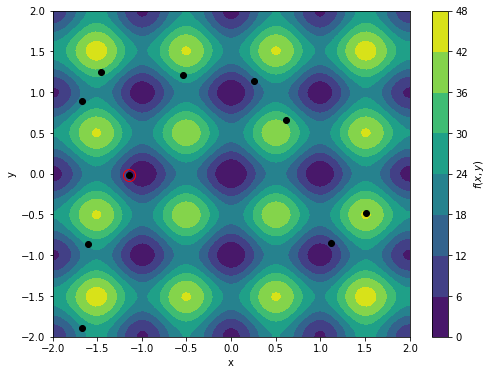

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.contourf(X, Y, Z)
cb = plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')

cb.set_label(r'$f(x, y)$')

fitness = np.inf
for ind in population:
    plt.plot(*ind.genome, 'ko')
    if ind.fitness < fitness:
        fitness = ind.fitness
        x, y = ind.genome

plt.plot(x, y, 'o', markerfacecolor='None', markeredgecolor='r', markersize=12);
print(f'Minimum of population at ({x:.2f},{y:.2f}) with f(x)={fitness}')

### Recombination - the crossover operator

The first operator in the evolution is the [recombination operator](https://en.wikipedia.org/wiki/Crossover_(genetic_algorithm)). Recombination is responsible for large changes in the solution vectors. The operator produces $k$ new solutions by combining genes of different individuals of the population. 

In addition to the population, the operator also depends on an additional set of parameters, controlling the reproduction of the individuals such as the probability $p_r$ that the genes of two individuals are recombined. GAs have in common that they favor recombination over mutation, hence, $p_r$ is chosen to be high (e.g. $p_r = 0.8$).

<img src="cxSinglePoint.jpg" width="700">

### Exercise 8. Implement crossover for two individuals
Single point crossover represents a possibility to combine the genes of two individuals, the two parents. A point on both parents' genes is picked randomly (use [$\texttt{randint}$](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)), and designated a 'crossover point'. Genes to the right of that point are swapped between the two parent chromosomes. This results in two children, each carrying some genetic information from both parents. Implement a Python function called $\texttt{crossover}$ that takes as input two $\texttt{Individuals}$ (the parents) that performs a single point crossover between two Individuals and returns two new $\texttt{Individuals}$ (the children). Test the function on two individuals with 5 genes, one having only zeros (parent 1) and one having only ones (parent 2) in their genes. Apply crossover on the parents to produce the children, evaluate the children and print the parents and children to the screen to check, if the crossover operator is working the right way. In this example, the fitness of the children should be between the fitness values of the parents.

In [11]:
def crossover(parent1, parent2):
    cr_point = np.random.randint(1, len(parent1.genome))
    genome1 = np.concatenate([parent1.genome[:cr_point], parent2.genome[cr_point:]])
    genome2 = np.concatenate([parent2.genome[:cr_point], parent1.genome[cr_point:]])
    
    child1 = Individual(genome=genome1)
    child2 = Individual(genome=genome2)
    
    return child1, child2

In [12]:
p1 = Individual(genome=np.zeros(5))
p2 = Individual(genome=np.ones(5))

c1, c2 = crossover(p1, p2)

for i in [p1, p2, c1, c2]:
    i.evaluate()

print('\nParents')
print(p1)
print(p2)


print('\nChildren')
print(c1)
print(c2)


Parents
Individual with Genome: [ 0.00,  0.00,  0.00,  0.00,  0.00] => f(x):  0.000
Individual with Genome: [ 1.00,  1.00,  1.00,  1.00,  1.00] => f(x):  5.000

Children
Individual with Genome: [ 0.00,  0.00,  1.00,  1.00,  1.00] => f(x):  3.000
Individual with Genome: [ 1.00,  1.00,  0.00,  0.00,  0.00] => f(x):  2.000


### Exercise 9. Recombination of the whole population - let the mating season begin

Write a Python function called $\texttt{recombination}$ which takes as input parameters a population and the crossover probability $p_c$. Build random pairs within the population (all Individuals will find a partner) and iterate over these pairs. Decide with a uniform random number $u \in [0, 1]$ if the parents will crossover their genes to produce new children ($u \leq p_c$). If $u > p_c$, then two new children are produced with the same genes as the parents. Return all new children as a Python list. Test the $\texttt{recombination}$ function on the population of exercise 6 with a crossover probability of $p_c=0.8$ . Evaluate the children and print them to the screen.

In [13]:
def recombination(population, CXPB):
    
    popsize = len(population)
    
    combinations = np.arange(0, popsize)
    np.random.shuffle(combinations)
    combinations = combinations.reshape((int(popsize/2), 2))
    
    children = []
    for i, j in combinations:

        parent1 = population[i]
        parent2 = population[j]

        if np.random.rand() < CXPB:
            child1, child2 = crossover(parent1, parent2)
        else:
            child1 = Individual(genome=parent1.genome)
            child2 = Individual(genome=parent2.genome)

        children.append(child1)
        children.append(child2)
        
    return children

In [14]:
children = recombination(population, 0.8)

for child in children:
    child.evaluate()

In [15]:
children

[Individual with Genome: [-1.15, -0.48] => f(x): 25.506,
 Individual with Genome: [ 1.51, -0.01] => f(x): 22.291,
 Individual with Genome: [-0.54,  1.21] => f(x): 28.956,
 Individual with Genome: [ 0.26,  1.14] => f(x): 15.225,
 Individual with Genome: [-1.67,  1.24] => f(x): 28.835,
 Individual with Genome: [-1.46,  0.90] => f(x): 24.644,
 Individual with Genome: [ 0.61, -0.86] => f(x): 22.165,
 Individual with Genome: [-1.60,  0.65] => f(x): 36.776,
 Individual with Genome: [ 1.12, -1.89] => f(x):  9.936,
 Individual with Genome: [-1.67, -0.85] => f(x): 22.259]

### Mutation operator

The second operator in the GA is the mutation operator. This operator produces small changes to the genes of an individual, hence, broadening the genetic variability of a population. GAs have in common that the mutation operator is applied with a low probability $p_m$ so that mutation works more as a "background operator" (usually $p_m \leq 0.2$).

A gene in the genome of the children is taken at random and altered due to a certain random procedure with a certain probability.

<img src="mutBitFlip.jpg" width="700">

### Exercise 10. Implement and apply mutation on the children

Implement the mutation operator by writing a function $\texttt{mutation}$. The input parameters of the function are the children obtained through the recombination function, the mutation probability $p_m$ and a standard deviation $\sigma$. Iterate over all children and randomly decide with help of $p_m$, if the genome of the child should be mutated. If the child is mutated, choose a gene of the genome at random and add a Gaussian distributed random number with mean $mu=0.0$ and standard deviation $\sigma=0.25$ to the gene. The function should return the children. Apply the function on the children that were produced in exercise 9 to test it.

In [16]:
def mutation(children, MUTPB, sigma=0.25):
    
    for child in children:
        if np.random.rand() < MUTPB:
            n = len(child.genome)
            mut_int = np.random.randint(0, n)
            child.genome[mut_int] += np.random.normal(0.0, scale=sigma)
            
    return children


In [17]:
children = mutation(children, 0.2)

In [18]:
children

[Individual with Genome: [-1.15, -0.52] => f(x): 25.506,
 Individual with Genome: [ 1.51, -0.01] => f(x): 22.291,
 Individual with Genome: [-0.54,  1.21] => f(x): 28.956,
 Individual with Genome: [ 0.26,  1.14] => f(x): 15.225,
 Individual with Genome: [-1.67,  1.24] => f(x): 28.835,
 Individual with Genome: [-1.46,  0.90] => f(x): 24.644,
 Individual with Genome: [ 0.61, -0.67] => f(x): 22.165,
 Individual with Genome: [-1.60,  0.65] => f(x): 36.776,
 Individual with Genome: [ 1.12, -1.74] => f(x):  9.936,
 Individual with Genome: [-1.67, -0.85] => f(x): 22.259]

### Selection operator

The last operator in the GA is the selection operator. This operator chooses $popsize$ individuals
from the through mutation and recombination altered population of parents and children based on their fitness. Fitter individuals are chosen with higher probability.

### Roulette wheel selection

Roulette wheel selection is also called [fitness proportionate selection](https://en.wikipedia.org/wiki/Fitness_proportionate_selection). Individuals with a higher fitness (lower fitness value) are chosen with higher probability. The probability to choose an individual is 
\begin{align}
    p_i \ = \ \frac{max(f) - f_i}{\sum_{j=1}^{N} (max(f) - f_j)}
\end{align}

max(f) is the maximum of all fitness values in the population and is necessary to scale the fitnesses for minimisation. 
Additionally, to make sure that the best individual of a population –the one with the lowest fitness value–  is not lost during the evolution, one can make sure to always choose the best individual as part of the selected population. This is called elitism.

<img src="Selection.jpg" width="900">

### Exercise 11. The selection operator.

Write a Python function $\texttt{selection}$ that takes a population and the number of chosen individuals of this population as input parameters. Implement the roulette wheel selection algorithm with elitism as described above. Remove Individuals that have been chosen from the population so that they can't be chosen multiple times ([$\texttt{pop}$](https://docs.python.org/3.7/tutorial/datastructures.html) removes an element from a list by index). Don't forget to recompute the probabilities each time you remove an individual! The function should return individuals that are chosen from the population according to the probabilities build by their fitness value. (Hint: Use the cumulative sum of the probabilities and a random number between 0 and 1 to decide which individual of the population is chosen. With numpy's [argmin](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html) function one can find the best individual in the fitnesses).


In [19]:
def selection(population, number=20, elitism=True):
    
    
    # Produce vector containing all fitnesses:
    fitness = []
    for ind in population:
        ind.evaluate()
        fitness.append(ind.fitness)

    if elitism:
        # Find fittest individual
        index = np.argmin(fitness)
        best = population[index]
        chosen = [best]
        
        # Remove best individual from population and fitness
        population.pop(index)
        fitness.pop(index)
        
        # Reduce the number of the chosen individuals by one, since one individual has already been chosen
        number -= 1
    else:
        chosen = []
    for n in range(number):
        
        # Compute the scaled fitness values and the probabilities
        scaled = np.max(fitness) - fitness
        probabilities = np.cumsum(scaled / np.sum(scaled))
        
        r = np.random.random()
        index = (r >= probabilities).sum()
        chosen.append(population[index])
        
        # Remove best individual from population and fitness
        population.pop(index)
        fitness.pop(index)

    return chosen

In [20]:
selection(population + children, number=4)

[Individual with Genome: [-1.15, -0.01] => f(x):  5.416,
 Individual with Genome: [ 0.61, -0.67] => f(x): 22.165,
 Individual with Genome: [-1.67,  0.90] => f(x): 20.561,
 Individual with Genome: [ 0.26,  1.14] => f(x): 15.225]

### Exercise 12. A simple genetic algorithm - Putting it all together

Write a Python script where you utilize all operators that you have developed in the exercises before. 

First, initialize a population of individuals with $D=2$ between $x_i \in [-2, 2]$ with a population size of 100. Then make a for loop over 500 generations. In each generation, use the recombination function to produce children with a crossover probability of $p_c=0.8$. Mutate the children with a mutation probability of $p_m=0.2$ and $\sigma=0.25$. Use the roulette wheel selection function to select $popsize$ individuals from the parent population and children combined. Make sure that the fittest individual is always chosen (elitism). If the fitness of the fittest individual is lower than 0.0001, terminate the evolution by using the [$\texttt{break}$](https://docs.python.org/3.7/tutorial/controlflow.html#break-and-continue-statements-and-else-clauses-on-loops) command. Track the fitness of the fittest individual in each generation and plot this value as a function of the generations in a semi-logarithmic plot ([$\texttt{semilogy}$](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.semilogy.html)). Don't forget axis labels and titles!
Print the overall fittest individual to the screen.

In [21]:
popsize = 100
ngen = 500

CXPB = 0.8
MUTPB = 0.2

# Initialisation
population = []
for _ in range(popsize):
    ind = Individual(genome=np.random.uniform(low=-2.0, high=2.0, size=2))
    population.append(ind)

f_min = np.full((ngen, 1), np.nan)

for gen in range(ngen):
    
    children = recombination(population, CXPB)
    
    children = mutation(children, MUTPB)
    
    population = selection(population + children, number=popsize, elitism=True)
    
    # Extract fitness values for statistics
    fits = [ind.fitness for ind in population]
    genomes = np.asarray([ind.genome for ind in population])
    f_min[gen] = np.min(fits)
    
    if f_min[gen] < 0.0001:
        break

# Plot fittest individual:
fitness = [individual.fitness for individual in population]
index = np.argmin(fitness)
print(population[index])

Individual with Genome: [ 0.00,  0.00] => f(x):  0.000


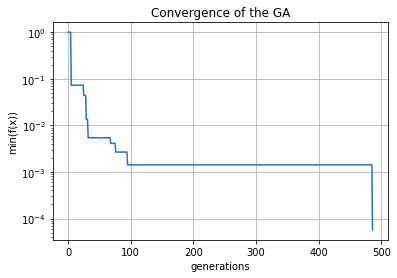

In [22]:
plt.semilogy(f_min)
plt.xlabel('generations')
plt.ylabel('min(f(x))')
plt.title('Convergence of the GA')
plt.grid(True)

### Exercise 13. Escape local optima with GAs
Use the code from above, but alter it a little bit. Intitialize the population in the right upper corner with $x_i \in [0.5, 2.0]$. Increase the number of generations to 2000. Additionally, track the mean $x$ and $y$ coordinate positions over all individuals of the population during the evolution. This is called the trajectory. Run the optimisation.

Plot the contour plot of the Rastrigin function as in exercise 3. Highlight the area where the solutions were initially generated in the contour plot with two black dashed lines. Plot the trajectory of the evolution as black line. Can you see that the population jumps from local optimum to local optimum until it finds the global one?

This is an advantage of [Metaheuristic algorithms](https://en.wikipedia.org/wiki/Metaheuristic). They are able to escape local optima in contrast to deterministic methods.

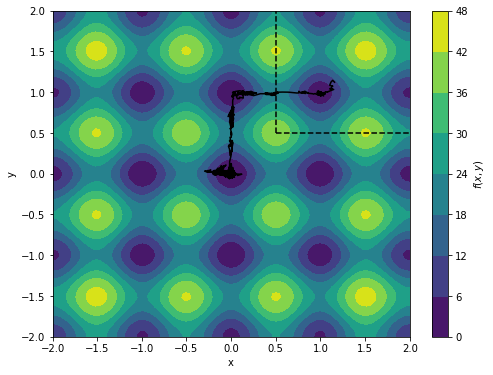

In [23]:
popsize = 100
ngen = 2000

CXPB = 0.8
MUTPB = 0.2

# Initialisation
population = []
for _ in range(popsize):
    ind = Individual(genome=np.random.uniform(low=0.5, high=2.0, size=2))
    population.append(ind)


xy_mean = np.full((ngen, 2), np.nan)#(np.empty((ngen, 2))).fill(np.nan)
f_min = np.full((ngen, 1), np.nan)
f_std = np.full((ngen, 1), np.nan)

for gen in range(ngen):
    
    children = recombination(population, CXPB)
    
    children = mutation(children, MUTPB)
    
    population = selection(population + children, number=popsize, elitism=True)
    
    # Extract fitness values for statistics
    
    fits = [ind.fitness for ind in population]
    genomes = np.asarray([ind.genome for ind in population])
    xy_mean[gen, :] = np.mean(genomes, axis=0)
    f_min[gen] = np.min(fits)
    f_std[gen] = np.std(fits)
    
    if f_min[gen] < 0.0001:
        break

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.contourf(X, Y, Z)
cb = plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')

plt.plot([0.5, 2.0], [0.5, 0.5], 'k--')
plt.plot([0.5, 0.5], [0.5, 2.0], 'k--')

cb.set_label(r'$f(x, y)$')
plt.plot(xy_mean[:,0], xy_mean[:,1], 'k-');
